Communiquer sur le web c’est évidemment rédiger du texte, agrémenter d’images, de vidéos ou de sons, référencer mais c’est aussi implanter des hyperliens en mettant en relation des contenus et/ou des organisations. 

Il n’y a pas de règles établies pour la description des hyperliens entre les sites :
la motivation de leur mise en place est aussi variée que les choix terminologiques (Reymond, 2007; Thelwall, 2006), toutefois nous pouvons formuler quelques hypothèses contextuelles à notre domaine d’analyse : tourisme et parc-national. L’hypothèse naïve est que les acteurs du tourisme utilisent l’image du parc pour leur propre communication. Ce qui suit vise à affiner, vérifier et décrire cette hypothèse. 




# Agrégation et préparation de la visualisation

Avant de pouvoir effectuer une quelconque opération de traitement pour voir le réseau de noeuds du contexte sur lequel nous vous proposons qui est celui du Parc National de Port-Cros, il est nécessaire de réaliser un traitement des données en passant entre autre par une agrégation de ces dernières.


## Définition des librairies

Afin de pouvoir gérer au mieux, l'ensemble des données dont nous disposons, nous utiliserons un total de trois librairies.

In [1]:
# ************************[ Librairies Utilisées ]************************************************************************************

import pandas as pd    #Gestion des Dataframes & Import/ Export Csv
from urllib.parse import urlparse #Utilisation de l'option netloc pour filtrer les DNS
import networkx as nx #Utilisation pour export du résultat en format Gexf pour visualisation

* ``Pandas`` nous permettra de gérer le volume important de données présentes dans les trois fichiers `CSV` que nous avons comme source.
* ``Urllib.parse`` nous permettra de filtrer les différentes adresses présentes afin d'en récupérer le nom de domaine uniquement, ce qui nous permet dans la finalité de pouvoir effectuer l'ensemble des opérations que nous avons prévu de réaliser par la suite le plus facilement possible.
* ``networkx`` nous permettra d'avoir une prévisualisation du réseau de noeuds représentant les interactions entre les différents acteurs et le Parc National. Cette librairie nous permettra également d'exporter un fichier `Gexf` qui sera utilisé pour la réalisation d'une carte du réseau plus précise et complète. 

## Les fonctions de ce script

l'action principale de ce script sera d'utiliser la fonction Parser afin de récupérer le nom de domaine d'une adresse présente dans nos données.

In [2]:
#************************[ Fonctions Utilisées ]************************************************************************************

#On créée une fonction qui va effectuer un netloc (récupération adresse DNS) des adresses présentes dans le document
def Parser(Referring_Url):
    if Referring_Url == '':
        pass
    else:
        obj = urlparse(Referring_Url)
    return obj.netloc

## Pré-traitement des données

Chaque `df(x)` présent dans le script a pour but de charger le contenu des fichiers CSV que nous possédons. Dans notre cas de figure, ceux ci sont au nombre de trois, et chacun traite un des noms de domaine du Parc National (portcrosparcnational.fr , portcros-parcnational.fr et prod-pnpc.parcnational.fr)

Les fichiers sont chargé sous format `utf-16` pour palier aux problèmes du contenu de ces fichiers, c'est à dire la présence de virgules et de points virgules dans certaines cellules et que nous ne pouvons pas nous permettre de supprimer.

Afin de vérifier le bon chargement des données, on effectue un test afin de vérifier la lecture de ces dernières.

Pour finir, nous réalisons une fusion des trois fichiers initiaux dans la variable dfappend qui contiendra l'ensemble des données, dans lequel nous créons un nouvel index car chaque CSV avait son propre index, ce qui pourrait causer des problèmes par la suite.

In [3]:
#************************[ Traitement Initial ]************************************************************************************


df0 = pd.read_csv('www.portcrosparcnational.fr-backlinks.csv', encoding='utf-16', sep='\t') #ouveture de la source 1
df1 = pd.read_csv('www.portcros-parcnational.fr-backlinks.csv', encoding='utf-16', sep='\t') #ouverture de la source 2
df2 = pd.read_csv('prod-pnpc.parcnational.fr-backlinks.csv', encoding='utf-16', sep='\t') #ouverture de la source 3

print(df0.info(verbose=False)) #Vérification d'acquisition
print('*****************************************')
print(df1.info(verbose=False)) #Vérification d'acquisition
print('*****************************************')
print(df2.info(verbose=False)) #Vérification d'acquisition
print('*****************************************')



dfappend = df0.append([df1,df2], ignore_index=True) #On créé le contenu dfappend qui est l'ensemble des csv à la suite. La fonction Ignore_index créé un nouvel index qui ne se base pas sur les précédents.
dfappend.reset_index(drop=True)


C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59132 entries, 0 to 59131
Columns: 22 entries, # to Linked Domains
dtypes: float64(6), int64(6), object(10)
memory usage: 9.9+ MB
None
*****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222258 entries, 0 to 222257
Columns: 25 entries, # to Linked Domains
dtypes: float64(6), int64(6), object(13)
memory usage: 42.4+ MB
None
*****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5307 entries, 0 to 5306
Columns: 22 entries, # to Linked Domains
dtypes: float64(6), int64(6), object(10)
memory usage: 912.3+ KB
None
*****************************************


,#,Domain Rating,URL Rating (desc),Referring Domains,Referring Page URL,Referring Page Title,Internal Links Count,External Links Count,Link URL,TextPre,...,Last Check,Day Lost,Language,Traffic,Keywords,Js rendered,Linked Domains,Redirect chain (from),Redirect chain (to),Redirect type
0,1,65,53,1074.0,http://www.mercantour-parcnational.fr/fr,Parc national du Mercantour |,138,40,http://www.portcrosparcnational.fr/,NaN,...,2020-02-23 04:37:04,NaN,fr,2986.0,424.0,NaN,23,NaN,NaN,NaN
1,2,63,51,842.0,http://www.calanques-parcnational.fr/fr,Parc national des Calanques |,173,34,http://www.portcrosparcnational.fr/,NaN,...,2020-02-22 22:02:45,NaN,fr,3008.0,498.0,NaN,21,NaN,NaN,NaN
2,3,67,50,824.0,http://www.cevennes-parcnational.fr/fr,Parc national des Cévennes |,203,37,http://www.portcrosparcnational.fr/,NaN,...,2020-02-23 14:12:48,NaN,NaN,938.0,935.0,NaN,20,NaN,NaN,NaN
3,4,55,50,692.0,http://www.parcsnationaux.fr/fr,Portail des parcs nationaux de France |,121,33,http://www.portcrosparcnational.fr/,NaN,...,2020-02-22 08:31:31,NaN,fr,1844.0,325.0,NaN,21,NaN,NaN,NaN
4,5,62,48,579.0,http://www.vanoise-parcnational.fr/fr,Parc national de la Vanoise |,188,51,http://www.portcrosparcnational.fr/,NaN,...,2020-02-23 14:30:15,NaN,fr,2424.0,146.0,NaN,21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286692,5303,23,8,0.0,https://lookformedical.com/fr/web/response-ele...,Response elements. Recherche médicale. Web,239,35,http://prod-pnpc.parcnational.fr/fr/rapports-s...,NaN,...,2019-12-26 01:02:29,NaN,fr,0.0,0.0,NaN,23,NaN,NaN,NaN
286693,5304,23,8,0.0,https://lookformedical.com/fr/web/response-ele...,Response elements. Recherche médicale. Web,239,35,http://prod-pnpc.parcnational.fr/fr/rapports-s...,NaN,...,2019-12-26 01:02:29,NaN,fr,0.0,0.0,NaN,23,NaN,NaN,NaN
286694,5305,7,7,0.0,http://www.alcedo-conseil.com/component/conten...,Alcedo Conseil,17,37,http://prod-pnpc.parcnational.fr/fr/rapports-s...,compte-rendu du suivi Discoglosse sarde dans l...,...,2020-01-25 04:39:25,NaN,NaN,0.0,0.0,NaN,21,NaN,NaN,NaN
286695,5306,7,7,0.0,https://www.alcedo-conseil.com/component/conte...,Alcedo Conseil,17,38,http://prod-pnpc.parcnational.fr/fr/rapports-s...,compte-rendu du suivi Discoglosse sarde dans l...,...,2020-02-13 11:55:19,NaN,fr,0.0,0.0,NaN,22,NaN,NaN,NaN


A partir de ce moment, nous n'utiliserons plus les df(x) pour le traitement des données.


## Traitement et agrégation des données


Pour commencer le traitement de nos données, nous allons utiliser la variable Parser vue auparavant, afin de pouvoir récupérer dans un premier temps les noms de domaine des acteurs recensés dans nos fichiers. Ces noms de domaines seront stockés dans une nouvelle colonne nommée `DNS Source`.

Puis nous allons effectuer la même opération pour déterminer quel nom de domaine est utilisé par ces mêmes acteurs pour utiliser l'image du Parc National de Port Cros.
Ce nom de domaine sera stockée dans une nouvelle colonne nommée `DNS Cible`.

Enfin, nous allons également préparer pour la visualisation de données une dernière colonne nommée `DNS de Sortie` qui va vérifier le nom de domaine cible, et donner dans une troisième colonne, nommée "DNS de Sortie" , le nom de domaine sur lequel l'utilisateur arrive après avoir subit une redirection. Cette vérification est effectuée grace aux connaissances que nous possédons sur le cas présenté.

In [4]:
#************************[ Ajout de Colonnes Dataframe ]************************************************************************************

dfappend['DNS Source'] = dfappend['Referring Page URL'].apply(lambda x : Parser(x)) #on créé un netloc de Ref dans dfappend
dfappend['DNS Cible'] = dfappend['Link URL'].apply(lambda y : Parser(y))        # On créé un netloc de Link dans dfappend


dfappend['DNS de Sortie'] = dfappend['DNS Cible'] #On créé une colonne DNS Sortie qui est la copie de DNS Cible
dfappend['DNS de Sortie'].replace(to_replace=["www.portcrosparcnational.fr","prod-pnpc.parcnational.fr"], value="www.portcros-parcnational.fr", inplace=True) #On remplace les DNS servant de redirection par le nom du DNS vers lequel ils redirigent (DNS connu)



par la suite nous allons filtrer l'ensemble du fichier dans la variable `Dfmax`.
Cette variable a pour but de ne contenir qu'une seule page de chaque acteur présent dans le fichier.
Et nous cherchons à ne garder que la page ayant le poids le plus important pour chaque acteur en terme de traffic.

Nous allons donc filtrer avec le Nom de Domaine récupéré précédemment récupéré conjointement à la colonne `Traffic`.

Dans certains cas, certaines pages peuvent avoir la même valeur de traffic, dans ce cas et pour ne pas fausser notre compte nous allons supprimer les doublons.

In [5]:
#************************[ Filtrage d'occurence : variable dfmax ]************************************************************************************

idx = dfappend.groupby(['DNS Source'])['Traffic'].transform(max) == dfappend['Traffic'] #A partir de la colonne 'DNS Source' nous recherchons l'occurence ayant la plus haute valeur par rapport à la valeur de Traffic
dfmax =dfappend[idx]
dfmax.drop_duplicates('DNS Source', inplace=True)
print(dfmax.info(verbose=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1368 entries, 0 to 286689
Columns: 28 entries, # to DNS de Sortie
dtypes: float64(6), int64(6), object(16)
memory usage: 309.9+ KB
None


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Comme vous pourrez le constater, nous passons d'un tableau possédant plus de 280 000 références, à un tableau possédant uniquement 1368 références.

Nous nous sommes donc posé la question suivante : quelle est la fréquence d'utilisation de liens renvoyant aux noms de domaine du Parc National de Port Cros pour chaque acteur ?

Nous avons donc créé un compteur d'occurences.

Pour cela, nous avons initié la variable `NodeRef`, qui contient le contenu de la colonne "DNS Source", que nous avons réindexé par la suite, pour posséder un index des adresses DNS de nos acteurs, ce qui va nous permettre d'utiliser la fonction Value_Counts() de la librairie Pandas.

Cette dernière va créer une nouvelle liste ou ne sera présent qu'une seule fois chaque Nom de Domaine des différents acteurs, et compter le nombre de fois que ce dernier est présent.

In [6]:
#************************[ Compteur d'occurences ]************************************************************************************

NodeRef = dfappend['DNS Source'] # Création d'une liste comportant les différents DNS du CSV

NodeIndex= pd.Index(NodeRef) #On créée un index des DNS avec Panda

NodeCount = NodeIndex.value_counts().reset_index() #On compte le nombre de fois que chaque DNS est présent dans la liste (Value_Count) et on attribue un numéro à chaque DNS (reset_index)

NodeCount.columns = ['DNS Source', 'Occurences'] #On renomme les colonnes de manière à ce qu'il soit possible de comprendre leur correspondance

print(NodeCount) #Vérification d'acquisition

Agreg = pd.merge(NodeCount, dfmax, on='DNS Source', how='outer') #On fusionne les deux tableaux (NodeCount, dfmax) à partir de la colonne DNS Source présente au sein des deux


                        DNS Source  Occurences
0              www.bandol-blog.com       83560
1      www.portcrosparcnational.fr       60441
2                 www.aqualike.com       45580
3     www.portcros-parcnational.fr       10592
4      www.ramatuelle-tourisme.com        8328
...                            ...         ...
1372                abuelacata.com           1
1373               www.barquita.fr           1
1374              aunomduvivant.fr           1
1375              centuria-rit.com           1
1376            var.ffrandonnee.fr           1

[1377 rows x 2 columns]


Nous pouvons constater sur l'ensemble des appels aux Noms de Domaines relevés, plus de 83 000 proviennent du site www.bandol-blog.com. C'est à dire plus de 29% des appels de la liste. Nous constatons également que plus de 21% des appels détectés proviennent du site du Parc National. Il s'agit entre autre, des liens entre les différentes pages du Parc.

Pour notre visualisation de données, ce rendu n'est pas suffisant.
Nous allons donc le fusionner avec la fonction merge de Pandas avec la variable dfmax précédemment créée. Cela nous permettra d'avoir un exemple de page pour chaque Acteur, tout en connaissant le poids de l'acteur dans notre visualisation grâce aux occurences constatées.

Le conbtenu sera enregistré dans la variable `Agreg`.

## Restitution et prévisualisation des données


Le traitement principal de nos données étant complet, nous allons exporter ces dernières pour les scripts qui seront utilisé par la suite.

In [7]:
#************************[ Restitution des données ]************************************************************************************

Agreg.to_csv('agregation_reseau.csv' ,encoding='utf-16', sep="\t") #Fichier de sortie correspondant aux valeurs les plus "fortes" du réseau. (Pour la partie 1)

NodeCount.to_csv('Index_reseau.csv' ,encoding='utf-16', sep="\t") # Index de tous les sites utilisant le réseau sélectionné. Sert de base pour la géolocalisation des différentes entreprises (Pour la partie 2 et 3)

dfappend.to_csv('Appended.csv' , encoding='utf-16', sep="\t") #Fichier comprenant l'ensemble des données sans filtre. Sera utilisé pour l'acquisition de contexte (Pour la partie 3)


Nous créons un total de trois nouveaux fichiers CSV.
* Le premier, `agregation_reseau.csv` contient le contenu de la variable `Agreg`. Il s'agit d'un fichier nous permettant de voir le résultat souhaité de notre traitement des données.
* Le second, `Index_reseau.csv` contient l'index de tous les acteurs utilisant les noms de domaine du Par national. Grâce à ce dernier nous allons pouvoir géoréférencer les acteurs et les marquer sur une carte.
* Le troisième, `Appended.csv` contient l'ensemble des données des trois fichiers initiaux, plus le traitement que nous avons effectué sur les adresses présentes sur les fichiers. Cela nous permettra lorsque nous souhaiterons récupérer le contexte de l'appel au nom de domaine du Parc de ne pas avoir à effectuer un nouveau traitement des données.


En plus de ces trois CSV, nous allons également créer un fichier utilisable par le logiciel Gephy pour créer une visualisation détaillée du réseau numérique gravitant autour du Parc National.

### Prévisualisation des données

Nous allons donc convertir la variable Agreg, grâce à la librairie networkx en déterminant les noeuds du réseau. Nous lui expliquons grâce aux lignes de code ci dessous, que la colonne `DNS Source` contient les acteurs pointant vers le Parc.
La Colonne `DNS de Sortie` contient le Nom de Domaine vers lequel chaque acteur renvoie au travers du lien placé dans ses pages.
Enfin, la colonne `occurence` permet d'avoir un poids pour chaque lien.

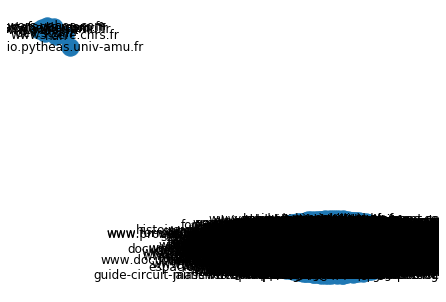

In [8]:
#************************[ Visualisation de données ]************************************************************************************

G = nx.from_pandas_edgelist(Agreg,'DNS Source','DNS de Sortie','Occurences') #On créée une variable G qui comporte une edgelist pour Panda
nx.draw(G, with_labels=True) #On effectue un essai pour voir si la variable est lisible en format graph
nx.write_gexf(G,"Agregation.gexf") #On exporte la variable G en format gexf sous le nom "Agrégation.gexf"

Par la suite nous avons utilisé la fonction draw de ``networkx`` afin de vérifier si gephy serait en mesure de comprendre ce que nous avons déterminé. Comme on peut le constater ci dessus, il est difficile de lire ce qui ressort de cette prévisualisation car l'ensemble des noms sont superposés. Cependant nous avons la confirmation que la variable a bien été établie; dans le cas contraire nous aurions eu un message d'erreur.

Nous pouvons donc exporter la variable au travers du fichier `Agregation.gexf`.


Avant de passer à la partie suivante, nous allons nettoeyer le registre de l'application afin d'alléger la mémoire de cette dernière et éviter d'éventuels conflit par la suite :

In [9]:
whos

Variable    Type         Data/Info
----------------------------------
Agreg       DataFrame                            D<...>n[1377 rows x 29 columns]
G           Graph        
NodeCount   DataFrame                            D<...>\n[1377 rows x 2 columns]
NodeIndex   Index        Index(['www.mercantour-pa<...>S Source', length=286697)
NodeRef     Series       0         www.mercantour-<...>th: 286697, dtype: object
Parser      function     <function Parser at 0x0000027255F901F8>
df0         DataFrame               #  Domain Rati<...>[59132 rows x 22 columns]
df1         DataFrame                 #  Domain Ra<...>222258 rows x 25 columns]
df2         DataFrame             #  Domain Rating<...>n[5307 rows x 22 columns]
dfappend    DataFrame               #  Domain Rati<...>286697 rows x 28 columns]
dfmax       DataFrame                 #  Domain Ra<...>n[1368 rows x 28 columns]
idx         Series       0          True\n1       <...>ngth: 286697, dtype: bool
nx          module       <mod

In [10]:
%reset -f

In [11]:
whos

Interactive namespace is empty.


# Géoréférencement des Acteurs

Après avoir effectué l'opération de traitement qui servira pour l'ensemble des parties, nous pouvons nous atteler à déterminer l'emplacement géographique des divers acteurs. Un point supplémentaire est à prendre en compte : dans cet exemple nous ne cherchons que les acteurs varois et allons donc filtrer notre liste pour ne garder que ces derniers.

In [ ]:
%reset -f

# Scrapping du Contexte d'utilisation

Afin de détailler précisément les informations que nous avons, nous souhaitons connaitre le contexte d'utilisation de l'hyperlien vers le site du Parc National.

s'agit-il d'une citation dans un texte ? Est-il dans une liste ? La liste est non exhaustive.

## Définition des librairies

Pour ce dernier script nous aurons besoin d'un total de 6 librairies :

In [12]:
#************************[ Librairies Utilisées ]************************************************************************************

import pandas as pd #Gestion des Dataframes & Import/ Export Csv

import requests
from bs4 import BeautifulSoup #Librairie scraping
import re # Permet la recherche partielle sur les pages
import time #pause du script pour évite blacklisting de l'adresse IP

from tqdm import tqdm #Affichage d'une barre de progression du script
tqdm.pandas()  #permet l'utilisation de la fonction pd.progress_apply pour voir la progression du script

C:\Users\Admin\anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


* ``Pandas`` nous permettra de gérer le volume important de données présentes dans les trois fichiers CSV que nous avons comme source.
* ``Requests``, nous permettra de récupérer le contenu des pages web recensées.
* ``Bs4`` , est la librairie qui nous permettra de traiter le contexte sur les pages récupérées.
* ``re`` , qui nous permettra d'effectuer une recherche partielle sur la page
* ``time``, nous permettra d'éviter un blacklisting potentiel afin de pouvoir continuer à accéder aux sites comme bandol-blog.com qui posséde un grand nombre de pages.
* ``tdqm``, qui nous permettra d'activer la fonction progress_apply avec la librairie Pandas. Cette dernière nous permettra d'avoir un visuel de la vitesse de traitement des données.


## Les fonctions de ce script


Ce script fonctionnera grâce à la fonction ``Scrapper``.
Cette dernière récupérera deux informations : 
- `Referring` (L'adresse de la page de l'acteur)
- `Cible` (Le nom de domaine de utilisé sur la page de l'acteur)

À partir de ces deux informations, la fonction grâce à la librairie requests va enregistrer le contenu de la page Referring.
La librairie ``Bs4`` sera ensuite utilisée, et plus précisément sa fonction `BeautifulSoup` qui va lire le contenu et le traiter, ce qui va nous permettre de rechercher dans la page les balises html "a" (qui contiennent les hyperliens).

Puis grâce à la librairie ``re`` nous allons filtrer de manière à ne récupérer que la balise a qui contiendra en référence une adresse comportant le Nom de Domaine.

Ce contenu sera stocké dans la variable `linkP` qui sera renvoyée comme résultat.

Entre chaque lancement de la fonction, nous aurons un `time.sleep` qui évitera un potentiel blacklisting de notre script.

In [3]:
#************************[ Fonctions Utilisées ]************************************************************************************

def Scrapper(Referring,Cible):
    req =''
    soup =''
    link =''
    linkP=''
    if Referring =='':
        pass
    else:
        req = requests.get(Referring) # La variable req récupére l'adresse présente dans 'Referring Page URL'
        soup = BeautifulSoup(req.text, 'lxml') #BeautifulSoup récupére la totalité de la page signalée au dessus
        for link in soup.find_all('a', href=re.compile(Cible)): #la fonction recherche le lien renvoyant vers la page de PortCros sur la page stockée
            linkP = link.parent #On récupére le contexte du lien présent sur la page
        time.sleep(2) #On marque une pause pour éviter le blacklisting potentiel de l'adresse IP sur le site.
    return linkP #On retourne le resultat dans DfVar['Scrapped']

## Pré-traitement des données

Cette fonction se basera sur le fichier `appended.csv` que nous avons créé lors de l'execution de notre première fonction.

Cependant, comme pour le géoréférencement, nous avons choisi de limiter notre recherche de contexte aux acteurs varois.
De ce fait nous allons également charger `DNS_Adresses_Filtrees.csv` que nous avons créé lors de la définition de notre géoréferencement.

Grâce à ces deux fichiers nous allons effectuer un "Merge" dans la nouvelle variable `DfVar`, qui sera paramétré de manière à ne récupérer que le contenu commun aux deux fichiers.

In [4]:
#************************[ Traitement Initial ]************************************************************************************
Df = pd.read_csv('appended.csv', encoding='utf-16', sep='\t') #Ouverture du csv contenant la totalité des adresses recensées
DfFilter = pd.read_csv('DNS_Adresses_Filtrees.csv', encoding='utf-16', sep='\t') #Ouverture du csv contenant les adresses varoises

DfVar = pd.merge(Df, DfFilter, on='DNS Source', how='inner') #On fusionne les deux csv précédents en ne gardant que les adresses ayant un dns en commun

print(DfVar.info(verbose=False))

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (12,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41119 entries, 0 to 41118
Columns: 34 entries, Unnamed: 0 to Communes
dtypes: float64(9), int64(7), object(18)
memory usage: 11.0+ MB
None


Nous passerons donc d'un traitement de 286 696 références à un traitement de 41 119 références.
Soit 1/7eme du fichier initial.

## Initialisation du script

Nous allons donc initialiser le script à partir de la variable `DfVar`.
Nous déterminons une nouvelle colonne dans les données nommée `Scrapped` celle ci contiendra le retour de la fonction ``Scrapper``.
Nous utilisons la fonction Pandas progress_apply dans laquelle nous allons déterminer les correspondances entre la variable et la fonction `DfVar`.
La Colonne `Referring Page URL` correspondra à la variable referring de Scrapper et DNS Cible à la partie Cible de Scrapper.

De plus grâce à `progress_apply` nous pourrons voir l'évolution de la progression du traitement des données ainsi qu'une estimation du temps restant avant la fin de ce dernier.

In [6]:
#************************[  ]************************************************************************************

DfVar['Scrapped'] =DfVar.progress_apply(lambda x : Scrapper(x['Referring Page URL'],x ['DNS Cible']),axis=1) #On lance la fonction Scrapper en se basant sur les Colonnes énumérées : le résultat arrive dans "Scrapped"



  0%|          | 2/41119 [00:03<18:59:10,  1.66s/it]

KeyboardInterrupt: 

Pour Finir nous restituerons les données dans un dernier fichier Csv nommé `PortCrosScrapped.csv` .

In [ ]:
#************************[ Restitution des données ]************************************************************************************

DfVar.to_csv('PortCrosScrapped.csv', encoding="utf-16", sep='\t') #Fichier de sortie comportant l'ensemble des données récupérées entre les différentes étapes pour les adresses varoises.

In [ ]:
%reset -f